In [7]:
## Standard imports
%matplotlib inline
import matplotlib.pyplot as plt
import pandas 
from datetime import datetime
import seaborn as sns
import glob
from os.path import basename
sns.set_context('paper')
import re
import csv
import json
import time
from scipy import stats
import numpy as np

## Analyze single samples. Code to compare two word distributions

In [8]:
topics = glob.glob('../data/sampling/*')

In [9]:
for t in topics:
    print(t)

../data/sampling/climate_change
../data/sampling/community_policing
../data/sampling/deep_state
../data/sampling/ebola
../data/sampling/gun_violence
../data/sampling/immigration
../data/sampling/network_neutrality
../data/sampling/teen_pregnancy
../data/sampling/us_election
../data/sampling/vaccines


## First plot raw counts

empty
empty
empty
empty


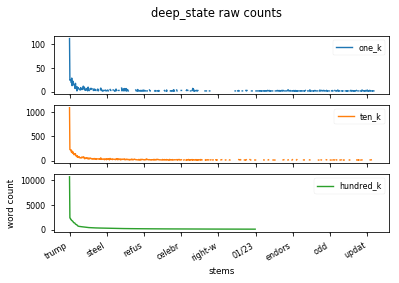

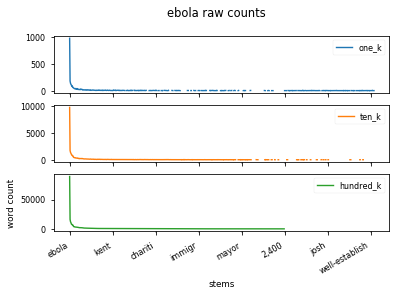

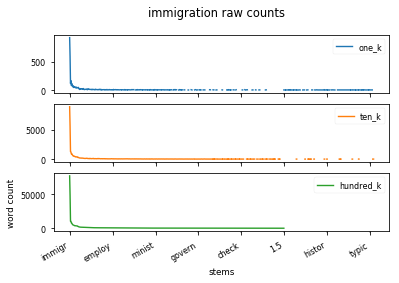

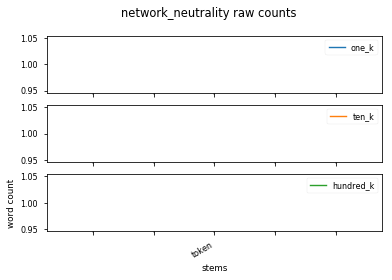

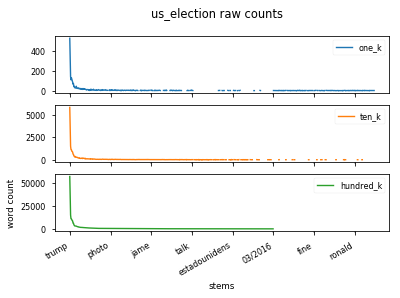

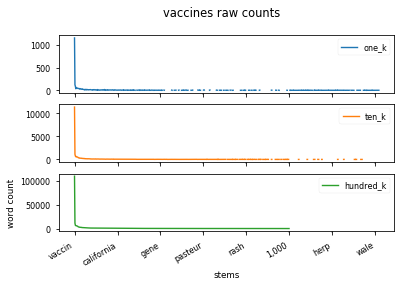

In [41]:
for t in topics:
    topic_name = basename(t)
    # load data
    one_k = pandas.read_csv(glob.glob(t + '/1000/*')[0])
    ten_k = pandas.read_csv(glob.glob(t + '/10000/*')[0])
    hundred_k = pandas.read_csv(glob.glob(t + '/100000/*')[0])
    
    # drop if empty
    if (one_k.empty or ten_k.empty or hundred_k.empty):
        print("empty")
        continue
        
    #preprocssing
    one_k = one_k.set_index('stem')
    ten_k = ten_k.set_index('stem')
    hundred_k = hundred_k.set_index('stem') 
        
    combined = pandas.concat([one_k['count'],
            ten_k['count'],
            hundred_k['count']], 
            axis=1)
    
    combined.columns = ['one_k','ten_k','hundred_k']
    
    combined = combined.sort_values('hundred_k',ascending=False) 
    combined.to_csv('../data/raw-counts/' + topic_name + "-raw.csv")
         
    combined.plot(subplots=True, title=topic_name + ' raw counts')
    #plt.tight_layout()
    plt.xlabel("stems")
    plt.ylabel("word count") 
    plt.savefig('../fig/raw-plots/' + topic_name + '-raw.png')
     

## Now, convert to freq

empty
empty
empty
empty


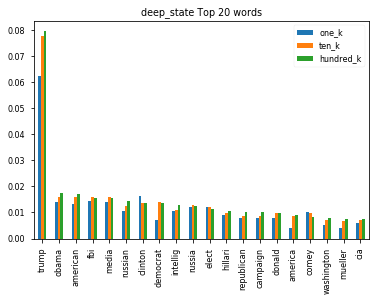

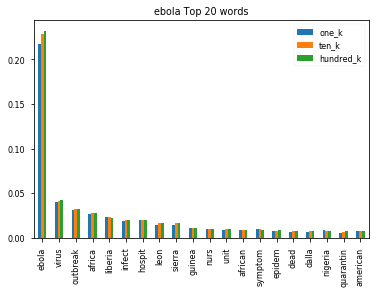

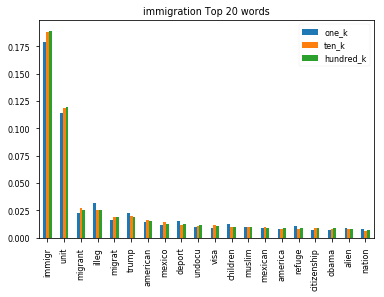

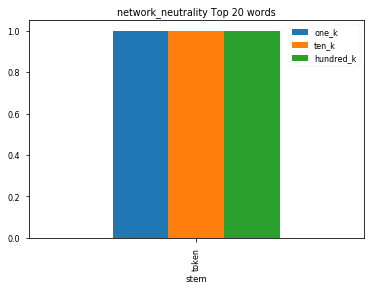

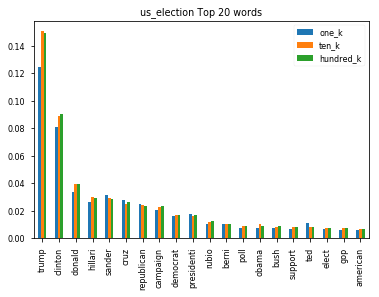

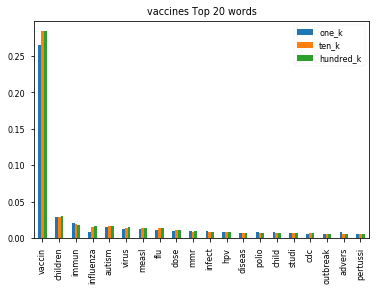

In [37]:
for t in topics:
    topic_name = basename(t)
    # load data
    one_k = pandas.read_csv(glob.glob(t + '/1000/*')[0])
    ten_k = pandas.read_csv(glob.glob(t + '/10000/*')[0])
    hundred_k = pandas.read_csv(glob.glob(t + '/100000/*')[0])
    
    # drop if empty
    if (one_k.empty or ten_k.empty or hundred_k.empty):
        print("empty")
        continue
        
    #preprocssing
    one_k = one_k.set_index('stem')
    ten_k = ten_k.set_index('stem')
    hundred_k = hundred_k.set_index('stem') 
             
        
    one_k['freq'] = one_k['count']/one_k['count'].sum().astype(np.float64)
    ten_k['freq'] = ten_k['count']/ten_k['count'].sum().astype(np.float64)
    hundred_k['freq'] = hundred_k['count']/hundred_k['count'].sum().astype(np.float64)
   
    combined = pandas.concat([one_k['freq'],
               ten_k['freq'],
                hundred_k['freq']], 
              axis=1)

    combined.columns = ['one_k','ten_k','hundred_k'] 
    
    combined = combined.sort_values('hundred_k',ascending=False) 
    combined.to_csv('../data/freq/' + topic_name + "-freq.csv")
         
#     combined.plot(subplots=False, title=topic_name + ' normalized')
#     #plt.tight_layout()
#     plt.xlabel("stems")
#     plt.ylabel("word count") 
#     plt.savefig('../fig/norm-plots/' + topic_name + '-norm.png')
     
    combined[:20].plot(subplots=False, kind='bar', title=topic_name + ' Top 20 words')
    #plt.ylim([0,1])
    plt.savefig('../fig/top-twenty/' + topic_name + '-freq.png')
    
     
    

## Comparing ranked lists.
### For each topic, how many similarities in top 100 words?

In [148]:
for t in topics:
    topic_name = basename(t)
    # load data
    one_k = pandas.read_csv(glob.glob(t + '/1000/*')[0], index_col=0)
    ten_k = pandas.read_csv(glob.glob(t + '/10000/*')[0], index_col=0)
    hundred_k = pandas.read_csv(glob.glob(t + '/100000/*')[0], index_col=0)
    
    # drop if empty
    if (one_k.empty or ten_k.empty or hundred_k.empty):
        #print("empty")
        continue
        
    # just in case, sort!
    one_k.sort_values('count', ascending=False, inplace=True)
    ten_k.sort_values('count', ascending=False, inplace=True)
    hundred_k.sort_values('count', ascending=False, inplace=True) 
    
    combined = pandas.concat([one_k.stem,
               ten_k.stem,
                hundred_k.stem], 
              axis=1)
    
    combined.columns = ['one_k','ten_k','hundred_k']
    combined.to_csv('../data/ranks/' + topic_name + '-rank.csv')
    
    print()
    print(topic_name)
    print("Number of stems in 1K, 10K, 100K samples:", 
          len(list(one_k.stem)), len(list(ten_k.stem)), len(list(hundred_k.stem)))
    
    print("Stems in 100K sample not in 1K sample:", len(set(hundred_k.stem) - set(one_k.stem)))
    print("Stems in 100K sample not in 10K sample:", len(set(hundred_k.stem) - set(ten_k.stem)))
    print()
    print("Top 100 stems in 100K sample not in 1K sample:", len(set(hundred_k.stem[:100]) - set(one_k.stem[:100])))
    print("Top 100 stems in 100K sample not in 10K sample:", len(set(hundred_k.stem[:100]) - set(ten_k.stem[:100])))
    print()
    print("Top 50 stems in 100K sample not in 1K sample:", len(set(hundred_k.stem[:50]) - set(one_k.stem[:50])))
    print("Top 50 stems in 100K sample not in 10K sample:", len(set(hundred_k.stem[:50]) - set(ten_k.stem[:50])))
    print()
    print("Top 10 stems in 100K sample not in 1K sample:", len(set(hundred_k.stem[:10]) - set(one_k.stem[:10])))
    print("Top 10 stems in 100K sample not in 10K sample:", len(set(hundred_k.stem[:10]) - set(ten_k.stem[:10])))
    
    
    
    
    
    print()
    


deep_state
Number of stems in 1K, 10K, 100K samples: 500 500 500
Stems in 100K sample not in 1K sample: 240
Stems in 100K sample not in 10K sample: 107

Top 100 stems in 100K sample not in 1K sample: 33
Top 100 stems in 100K sample not in 10K sample: 16

Top 50 stems in 100K sample not in 1K sample: 15
Top 50 stems in 100K sample not in 10K sample: 4

Top 10 stems in 100K sample not in 1K sample: 1
Top 10 stems in 100K sample not in 10K sample: 1


ebola
Number of stems in 1K, 10K, 100K samples: 500 500 500
Stems in 100K sample not in 1K sample: 172
Stems in 100K sample not in 10K sample: 63

Top 100 stems in 100K sample not in 1K sample: 21
Top 100 stems in 100K sample not in 10K sample: 7

Top 50 stems in 100K sample not in 1K sample: 7
Top 50 stems in 100K sample not in 10K sample: 2

Top 10 stems in 100K sample not in 1K sample: 0
Top 10 stems in 100K sample not in 10K sample: 0


immigration
Number of stems in 1K, 10K, 100K samples: 500 500 500
Stems in 100K sample not in 1K samp

## Compute ranking correlations
- for rankDCG: https://github.com/dkaterenchuk/ranking_measures
- for kendall's tau: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.weightedtau.html#scipy.stats.weightedtau


In [140]:
ten_k.head()

,count,stem,term
0,11370,vaccin,vaccine
1,1140,children,children
2,747,immun,immune
3,656,autism,autism
4,598,influenza,influenza


In [147]:
one_k.head()

,count,stem,term
0,1151,vaccin,vaccine
1,123,children,children
2,89,immun,immune
3,64,autism,autism
4,54,measl,measles


In [126]:
import measures

In [113]:
from scipy.stats import weightedtau

In [115]:
weightedtau([1,2,3],[3,2,1])

WeightedTauResult(correlation=-0.99999999999999978, pvalue=nan)

In [120]:
weightedtau([1,2,3],[3,2,10])

WeightedTauResult(correlation=0.54545454545454541, pvalue=nan)

In [116]:
weightedtau([1,2,3],[1,3,2])

WeightedTauResult(correlation=0.18181818181818177, pvalue=nan)

In [109]:
ten_k.head()

,count,stem,term
0,11370,vaccin,vaccine
1,1140,children,children
2,747,immun,immune
3,656,autism,autism
4,598,influenza,influenza


In [110]:
ten_k.rank()

,count,stem,term
0,500.0,475.0,475.0
1,499.0,83.0,83.0
2,498.0,213.0,213.0
3,497.0,48.0,49.0
4,496.0,231.0,231.0
5,495.0,488.0,488.0
6,494.0,270.0,270.0
7,493.0,177.0,177.0
8,492.0,144.0,144.0
9,491.0,283.0,283.0


In [ ]:
ten_k.count.m

In [105]:
for i in range(len(hundred_k.stem)):
    if one_k.stem[i] == hundred_k.stem[i]:
        continue
    else:
        print(i)
        break

3


In [107]:
hundred_k.stem

0              vaccin
1            children
2               immun
3           influenza
4              autism
5               virus
6               measl
7                 flu
8                dose
9                 mmr
10             infect
11                hpv
12             diseas
13              polio
14              child
15              studi
16                cdc
17           outbreak
18             advers
19           pertussi
20        anti-vaccin
21             infant
22              ebola
23              hepat
24             cancer
25               unit
26           administ
27          childhood
28           thimeros
29           efficaci
            ...      
471              site
469             japan
472            unicef
473            lesion
474              reli
475           rotateq
476    encephalopathi
477           lawsuit
478              call
479              armi
480            fisher
481            analyz
482               aap
483            steril
485       

In [106]:
ten_k.stem

0           vaccin
1         children
2            immun
3           autism
4        influenza
5            virus
6            measl
7              flu
8             dose
9              mmr
10             hpv
11          infect
12           polio
13             cdc
14          diseas
15           studi
16           child
18        pertussi
17          advers
19        outbreak
20           ebola
21          infant
22     anti-vaccin
23          cancer
24           hepat
25        administ
26        thimeros
27            mump
28        efficaci
29            unit
          ...     
490        vitamin
491         scienc
474        clinton
469          1,000
472          brian
461          topic
454          refer
455            pig
456    environment
457          david
471          award
459           sear
460           laiv
458          avian
462          deliv
463       northern
464         govern
465            bmj
466         febril
467             ve
468       prioriti
470         

In [ ]:
[((ten[k])) for i in range(len(hundred_k.stem))]

In [100]:
[(x,y) for x,y in zip(range(len(ten_k.stem), range(len(hundred_k.stem))]


[('vaccin', 'vaccin'),
 ('children', 'children'),
 ('immun', 'immun'),
 ('autism', 'influenza'),
 ('influenza', 'autism'),
 ('virus', 'virus'),
 ('measl', 'measl'),
 ('flu', 'flu'),
 ('dose', 'dose'),
 ('mmr', 'mmr'),
 ('hpv', 'infect'),
 ('infect', 'hpv'),
 ('polio', 'diseas'),
 ('cdc', 'polio'),
 ('diseas', 'child'),
 ('studi', 'studi'),
 ('child', 'cdc'),
 ('pertussi', 'outbreak'),
 ('advers', 'advers'),
 ('outbreak', 'pertussi'),
 ('ebola', 'anti-vaccin'),
 ('infant', 'infant'),
 ('anti-vaccin', 'ebola'),
 ('cancer', 'hepat'),
 ('hepat', 'cancer'),
 ('administ', 'unit'),
 ('thimeros', 'administ'),
 ('mump', 'childhood'),
 ('efficaci', 'thimeros'),
 ('unit', 'efficaci'),
 ('childhood', 'smallpox'),
 ('mercuri', 'mump'),
 ('rubella', 'mercuri'),
 ('antibodi', 'antibodi'),
 ('prevent', 'prevent'),
 ('inject', 'inject'),
 ('smallpox', 'rubella'),
 ('campaign', 'american'),
 ('h1n1', 'exempt'),
 ('disord', 'h1n1'),
 ('american', 'disord'),
 ('merck', 'death'),
 ('unvaccin', 'research'),

In [73]:
len(list(hundred_k.stem))

500

In [75]:
len(set(list(hundred_k.stem)) - set(list(one_k.stem)))

175

In [38]:
combined

,one_k,ten_k,hundred_k
vaccin,0.265268,0.284193,0.284505
children,0.028348,0.028494,0.029927
immun,0.020512,0.018671,0.017657
influenza,0.008297,0.014947,0.016073
autism,0.014750,0.016397,0.015985
virus,0.012215,0.014122,0.014578
measl,0.012445,0.013897,0.013810
flu,0.010602,0.013372,0.013411
dose,0.009680,0.011573,0.011554
mmr,0.009910,0.008973,0.009060


In [ ]:
for t in topics:
    topic_name = basename(t)
    # load data
    one_k = pandas.read_csv(glob.glob(t + '/1000/*')[0])
    ten_k = pandas.read_csv(glob.glob(t + '/10000/*')[0])
    hundred_k = pandas.read_csv(glob.glob(t + '/100000/*')[0])
    
    # drop if empty
    if (one_k.empty or ten_k.empty or hundred_k.empty):
        print("empty")
        continue
        
    #preprocssing
    one_k = one_k.set_index('term')
    ten_k = ten_k.set_index('term')
    hundred_k = hundred_k.set_index('term')
    
    # first, let's just plot the raw data.
    one_k['count'].plot()
    plt.xticks(rotation=70)
    plt.xticks([], [])
    plt.title(topic_name + " 1K sample")
    plt.savefig('../fig/raw-plots/' + topic_name + '-1K-raw.png')
    plt.close()
    
    # 10K
    ten_k['count'].plot()
    plt.xticks(rotation=70)
    plt.xticks([], [])
    plt.title(topic_name + " 10K sample")
    plt.savefig('../fig/raw-plots/' + topic_name + '-10K-raw.png')
    plt.close()
    
    # 100K
    hundred_k['count'].plot()
    plt.xticks(rotation=70)
    plt.xticks([], [])
    plt.title(topic_name + " 100K sample")
    plt.savefig('../fig/raw-plots/' + topic_name + '-100K-raw.png')
    plt.close()
    
     
#     one_k['normalized_ct'] = one_k['count']/one_k['count'].max().astype(np.float64)
#     ten_k['normalized_ct'] = ten_k['count']/ten_k['count'].max().astype(np.float64)
#     hundred_k['normalized_ct'] = hundred_k['count']/hundred_k['count'].max().astype(np.float64)
   
#     combined = pandas.concat([one_k['normalized_ct'][:20],
#                ten_k['normalized_ct'][:20],
#                 hundred_k['normalized_ct'][:20]], 
#               axis=1)

#     combined.columns = ['one_k','ten_k','hundred_k']
    
#     combined.sort_values('hundred_k',ascending=False).plot(kind='bar')
#     plt.ylabel('Normalized counts')
#     plt.title('Top 20 words, normalized')
    
#     plt.show()

#     # non-normalized
     
#     combined = pandas.concat([one_k['count'][:20],
#                ten_k['count'][:20],
#                 hundred_k['count'][:20]], 
#               axis=1)

#     combined.columns = ['one_k','ten_k','hundred_k']
    
#     combined.sort_values('hundred_k',ascending=False).plot(kind='bar')
#     plt.ylabel('Raw counts')
#     plt.title('Top 20 words, raw')
    
#     plt.show()
#     print("made it to the bottom")
    # first test: How many top 100 words similar?
    
    
    # second test: Plot all three charts: Is it logarithmic?
   

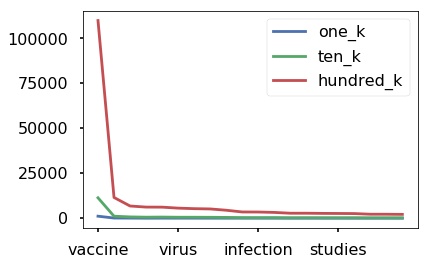

In [127]:
combined.sort_values('hundred_k',ascending=False).plot()

([], <a list of 0 Text xticklabel objects>)

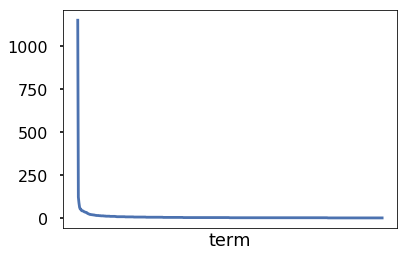

In [142]:
one_k['count'][:500].plot()
plt.xticks(rotation=70)
plt.xticks([], [])

In [ ]:
combined

In [62]:
one_k = one_k.set_index('term')
one_k['normalized_ct'] = one_k['count']/one_k['count'].max().astype(np.float64)

In [71]:
ten_k = ten_k.set_index('term')
ten_k['normalized_ct'] = ten_k['count']/ten_k['count'].max().astype(np.float64)

In [100]:
hundred_k = hundred_k.set_index('term')
hundred_k['normalized_ct'] = hundred_k['count']/hundred_k['count'].max().astype(np.float64)

In [101]:
combined = pandas.concat([one_k['normalized_ct'][:20],
               ten_k['normalized_ct'][:20],
                hundred_k['normalized_ct'][:20]], 
              axis=1)


In [102]:
combined.columns = ['one_k','ten_k','hundred_k']

Text(0.5,1,'Top 20 words, normalized')

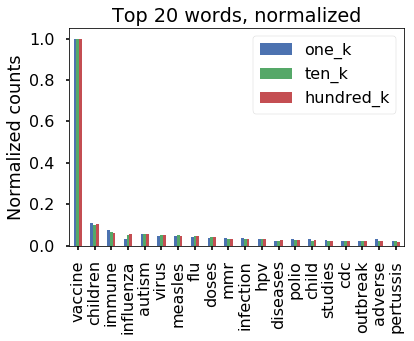

In [104]:
combined.sort_values('hundred_k',ascending=False).plot(kind='bar')
plt.ylabel('Normalized counts')
plt.title('Top 20 words, normalized')

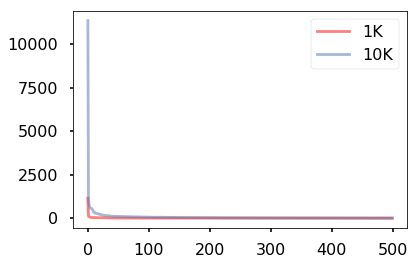

In [38]:
plt.plot(one_k['count'], alpha=0.5, label='1K', color='red')
plt.plot(ten_k['count'], alpha=0.5, label='10K')
plt.xlabel('')
plt.legend(loc='upper right')
plt.show()

/Users/Cat/Library/Python/3.6/lib/python/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


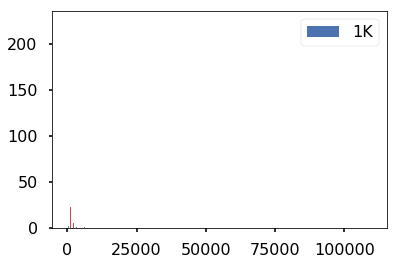

/Users/Cat/Library/Python/3.6/lib/python/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/Users/Cat/Library/Python/3.6/lib/python/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


In [44]:
with plt.style.context('seaborn-deep'):
    plt.hist([one_k['count'][:10], ten_k['count'][:10], hundred_k['count']][:10], bins=500,  label='1K')
    plt.legend(loc='upper right')
    plt.show()

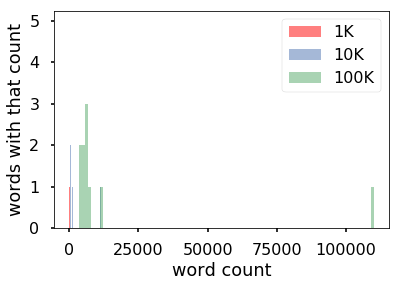

In [46]:
plt.hist(one_k['count'][:10],bins=100, alpha=0.5, label='1K', color='red')
plt.hist(ten_k['count'][:10],bins=100, alpha=0.5, label='10K')
plt.hist(hundred_k['count'][:10],bins=100, alpha=0.5, label='100K')
plt.legend(loc='upper right')
plt.ylabel("words with that count")
plt.xlabel("word count")
plt.show()

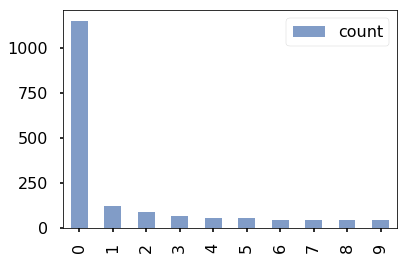

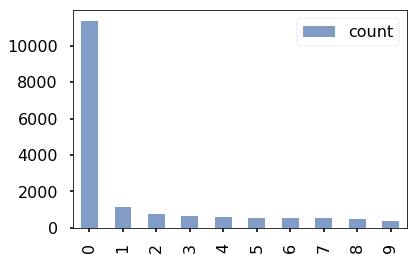

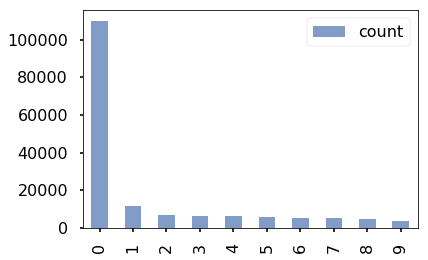

In [51]:
one_k[['term','count']][:10].plot(kind='bar',legend=True,label='1K', alpha=0.7) 
ten_k[['term','count']][:10].plot(kind='bar',legend=True, label='10K', alpha=0.7)
hundred_k[['term','count']][:10].plot(kind='bar',legend=True, label='100K', alpha=0.7)


In [39]:
one_k.head()

,Unnamed: 0,count,stem,term
0,0,1151,vaccin,vaccine
1,1,123,children,children
2,2,89,immun,immune
3,3,64,autism,autism
4,4,54,measl,measles


In [6]:
one_k = pandas.read_csv(glob.glob(topics[-1] + '/1000/*')[0])

In [7]:
ten_k = pandas.read_csv(glob.glob(topics[-1] + '/10000/*')[0])

In [8]:
hundred_k = pandas.read_csv(glob.glob(topics[-1] + '/100000/*')[0])

In [22]:
one_k.sort_values('count', ascending=False)[:100]

,Unnamed: 0,count,stem,term
0,0,1151,vaccin,vaccine
1,1,123,children,children
2,2,89,immun,immune
3,3,64,autism,autism
4,4,54,measl,measles
5,5,53,virus,virus
6,6,46,flu,flu
7,7,43,mmr,mmr
8,8,43,infect,infection
9,9,42,dose,doses


In [8]:
glob.glob(topics[0] + '/1000/*')

['../data/sampling/climate_change/1000/sample0.csv',
 '../data/sampling/climate_change/1000/sample1.csv',
 '../data/sampling/climate_change/1000/sample2.csv',
 '../data/sampling/climate_change/1000/sample3.csv',
 '../data/sampling/climate_change/1000/sample4.csv',
 '../data/sampling/climate_change/1000/sample5.csv',
 '../data/sampling/climate_change/1000/sample6.csv',
 '../data/sampling/climate_change/1000/sample7.csv',
 '../data/sampling/climate_change/1000/sample8.csv',
 '../data/sampling/climate_change/1000/sample9.csv']

### 1)  Immigration topic

In [ ]:
q = '+(immigra* OR migrat* OR migrant*) AND +(US OR "united states") and timespans_id:93598'

In [ ]:
start = time.time()

for N in [1000, 10000, 100000]:
    print("\n\n","N",N)
    for m in range(100):
        print("SAMPLE: ", str(m))
        start_s = time.time()
        sample = mc.wordCount(q, sample_size=N)
        print("TIME FOR API: ", str(time.time() - start_s), " SEC")
        path = '../data/sampling/immigration/'+ str(N) + "/sample" + str(m) + ".csv"
        print(path)
        pandas.read_json(json.dumps(sample), orient='records').to_csv(path)
        
print("TOTAL TIME FOR TOPIC: ", time.time() - start)

In [ ]:
print(54)

In [ ]:
one_k = mc.wordCount('+(immigra* OR migrat* OR migrant*) AND +(US OR "united states") and timespans_id:93598', sample_size=1000)

In [ ]:
ten_k = mc.wordCount('+(immigra* OR migrat* OR migrant*) AND +(US OR "united states") and timespans_id:93598', sample_size=10000)

In [ ]:
hundred_k = mc.wordCount('+(immigra* OR migrat* OR migrant*) AND +(US OR "united states") and timespans_id:93598', sample_size=100000)

In [ ]:
print(len(one_k))
print(len(ten_k))
print(len(hundred_k))

In [ ]:
sns.distplot(list(pandas.read_json(json.dumps(one_k), orient='records').head(100)['count']))

### 2) ebola


In [ ]:
len(mc.wordCount('ebola and timespans_id:150307', sample_size=1000)  )